In [1]:
#start with imports
import pandas as pd
import numpy as np
import os

import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

import matplotlib.pyplot as plt

%matplotlib inline

from collections import OrderedDict

/Users/dhheadquarters/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
#WE ARE GOING TO BE PREDICTING WHETHER A HURRICANE WILL RANDOMLY INTENSIFY OR NOT.
#FIRST WE WILL BRING IN THE DATASET
#CLEAN THE DATASET
#REMOVE NULL VALUES AND CATEGORICAL DATA
#VISUALIZE THE REMAINING 0 VALUES WITHIN THE DATA
#BRING IN THE RANDOMFORESTCLASSIFIER
#TRAIN THE DATA AND SEE WHAT THE PREDICTED DVMAX IS?
#IF THE DVMAX IS PREDICTED TO BE OVER 25 KNOTS THEN STORE AS 1 AND IF NOT THEN STORE AS 0
#CONVERT THE DVMAX_ANSWER COLUMN INTO AN ARRAY OF 1'S FOR OVER 25 KNOTS AND 0 FOR UNDER 25 KNOTS
#RUN THROUGH RANDOM FOREST WITHOUT ANY ADJUSTMENTS TO CLASSIFIER
#ADJUST THE HYPERPARAMETERS AND THEN RUN IT AGAIN
#USE FEATURE EXTRACTION TO UNDERSTAND AND BE ABLE TO TRAIN ON THE BEST COLUMNS
#WE SHOULD ACHIEVE 25% AND 30% ACCURACY AS THAT WAS THE SCORES DURING THE LATEST COMPETITION WITH SAME DATA

In [64]:
df = pd.read_csv('ships_TRAIN.csv')
df.head(1)

,Unnamed: 0,vmax,dvmax,clat,clon,MSLP,PER,SHRD,D200,RHLO,PX30,SDBT,POT,RHCN,NOHC,TPW,PC2,SHRD2,SHRG,DIVC,U200,EPSS,ENSS,TPWC,PC1,AVBT,AVBT2,SDBT2,PX10,PX20,PX50,TBMX,RSST,BTAV,SHTD,SHGC,T200,T250,Z850,EPOS,RHMD,TADV,DTL,PSLV,UMOV,VS
0,1998-07-27 12:00:00,25.0,5.0,11.3,-25.4,1009.0,3.562555,6.3,103.0,68.0,72.0,138.0,-101.0,0.0,12.0,0.0,-58.0,1.7,24.8,129.0,-7.9,2.1,3.0,55.7,0.0,-473.0,-364.0,187.0,98.0,82.0,42.0,-54.3,27.4,-57.3,0.1,203.0,-537.0,-411.0,72.0,7.1,67.0,0.0,270.161867,505.0,-96.0,7.05708


In [65]:
#we need to rename the first column to be date
df.rename(columns={'Unnamed: 0' : 'date'}, inplace = True)
df.head(1)

,date,vmax,dvmax,clat,clon,MSLP,PER,SHRD,D200,RHLO,PX30,SDBT,POT,RHCN,NOHC,TPW,PC2,SHRD2,SHRG,DIVC,U200,EPSS,ENSS,TPWC,PC1,AVBT,AVBT2,SDBT2,PX10,PX20,PX50,TBMX,RSST,BTAV,SHTD,SHGC,T200,T250,Z850,EPOS,RHMD,TADV,DTL,PSLV,UMOV,VS
0,1998-07-27 12:00:00,25.0,5.0,11.3,-25.4,1009.0,3.562555,6.3,103.0,68.0,72.0,138.0,-101.0,0.0,12.0,0.0,-58.0,1.7,24.8,129.0,-7.9,2.1,3.0,55.7,0.0,-473.0,-364.0,187.0,98.0,82.0,42.0,-54.3,27.4,-57.3,0.1,203.0,-537.0,-411.0,72.0,7.1,67.0,0.0,270.161867,505.0,-96.0,7.05708


In [66]:
#to show all the column and visibly look for 0 values in the min category of describe
pd.set_option('display.max_columns', 50)

df.describe()

,vmax,dvmax,clat,clon,MSLP,PER,SHRD,D200,RHLO,PX30,SDBT,POT,RHCN,NOHC,TPW,PC2,SHRD2,SHRG,DIVC,U200,EPSS,ENSS,TPWC,PC1,AVBT,AVBT2,SDBT2,PX10,PX20,PX50,TBMX,RSST,BTAV,SHTD,SHGC,T200,T250,Z850,EPOS,RHMD,TADV,DTL,PSLV,UMOV,VS
count,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.0,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000
mean,55.132673,1.610309,24.316416,-64.513921,990.399604,2.470309,15.680079,34.240792,69.867129,56.136247,161.443167,-67.464752,0.0,34.309495,152.654375,5.501613,17.430752,24.493960,34.084879,6.862812,3.728931,3.472792,57.798000,16.895665,-348.203436,-257.407559,213.266103,70.336703,63.270928,37.770542,-32.036994,27.645901,-37.340664,13.002653,247.271881,-532.091287,-416.124158,28.096832,9.105941,56.914059,2.574059,270.018038,614.714495,-17.188429,4.186561
std,26.058662,16.949435,7.867046,18.568310,19.556055,8.677754,9.544277,37.276699,6.847872,26.560179,62.290871,38.199781,0.0,30.921247,218.854321,89.632366,9.544723,10.492456,38.751077,14.372824,2.300312,2.361707,7.278464,9.118924,200.626189,161.426420,63.079385,24.874438,26.082741,25.358179,28.665204,2.102631,27.467916,8.872060,104.801477,16.666984,21.937018,55.433061,3.008730,10.589331,12.202751,197.840595,76.320406,44.424327,29.181274
min,15.000000,-110.000000,8.900000,-105.000000,882.000000,-45.000000,0.000000,-95.000000,41.000000,0.000000,19.000000,-143.000000,0.0,0.000000,0.000000,-225.000000,0.200000,4.800000,-95.000000,-34.800000,0.000000,1.000000,27.600000,0.000000,-807.000000,-716.000000,30.000000,0.000000,0.000000,0.000000,-85.400000,11.900000,-86.200000,0.000000,50.000000,-619.000000,-521.000000,-170.000000,0.000000,19.000000,-112.000000,-822.000000,301.000000,-126.000000,-145.343000
25%,35.000000,-5.000000,17.750000,-79.100000,985.000000,0.000000,8.900000,10.000000,66.000000,38.000000,118.102023,-97.000000,0.0,8.000000,0.000000,-61.000000,10.700000,17.100000,10.000000,-2.900000,2.100000,2.200000,54.700000,15.000000,-504.000000,-364.000000,173.000000,55.000000,46.000000,18.000000,-57.300000,27.300000,-61.200000,6.200000,173.000000,-540.000000,-423.000000,-4.000000,7.400000,50.000000,-1.000000,229.834543,567.000000,-46.000000,-5.017028
50%,50.000000,1.815745,24.316416,-64.513921,995.000000,2.444917,15.000000,34.240792,69.867129,56.136151,161.338785,-68.000000,0.0,32.000000,46.000000,5.485497,17.400000,24.000000,34.118492,6.800000,3.728931,2.700000,58.100000,15.000000,-348.146559,-257.440739,213.177358,70.260620,63.232158,37.866185,-32.008836,28.000000,-37.313658,11.500000,239.000000,-532.091287,-415.000000,28.096832,9.105941,56.914059,1.000000,270.161867,614.703667,-17.184987,2.362440
75%,65.000000,10.000000,30.000000,-50.900000,1005.000000,5.000000,19.800000,55.000000,74.000000,77.000000,196.000000,-44.000000,0.0,52.000000,161.000000,62.000000,22.100000,29.300000,56.000000,14.900000,5.300000,3.500000,62.300000,15.000000,-226.500000,-148.000000,251.000000,93.000000,86.000000,52.000000,-8.350000,29.000000,-18.600000,17.300000,292.000000,-523.000000,-404.000000,59.000000,11.100000,64.000000,5.000000,270.161867,660.000000,5.000000,9.090380
max,160.000000,95.000000,50.700000,-6.000000,1022.000000,75.000000,74.200000,205.000000,90.000000,100.000000,398.000000,85.000000,0.0,222.000000,900.000000,252.000000,67.600000,93.700000,214.000000,69.500000,11.900000,22.800000,78.800000,45.000000,188.000000,190.000000,417.000000,100.000000,100.000000,100.000000,22.900000,31.500000,21.200000,35.900000,896.000000,-457.000000,-361.000000,278.000000,18.000000,86.000000,360.000000,900.000000,899.000000,239.000000,346.214000


columns with a minimum of 0 or potential 0 values that need to be accounted for
- per 
- shrd
- px30
- rhcn - this one looks bad
- nohc
- tpw
- epss
- pc1
- px10
- px20
- px50
- shtd
- epos

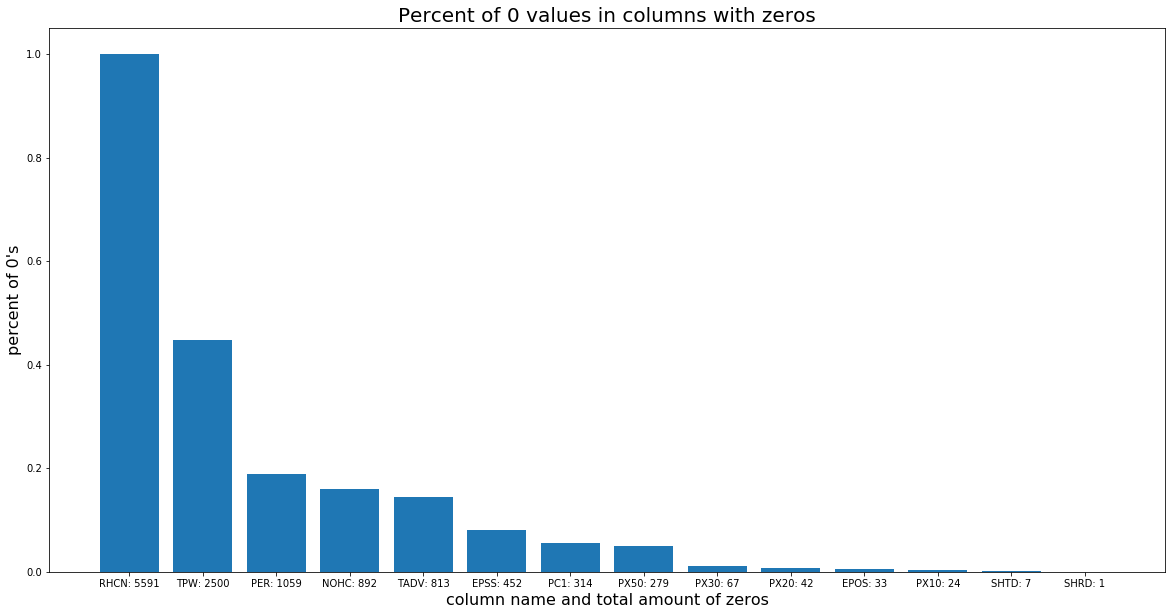

In [67]:
#run a for loop over the columns with 0 values. find out which columns have the most 0's
#lets visualize ssome zeros    
zero_columns = ['PER', 'SHRD', 'PX30', 'RHCN', 'NOHC',
                'TPW', 'EPSS', 'PC1', 'PX10', 'PX20',
                'PX50', 'SHTD', 'EPOS', 'TADV']

def zero_test(df):
    '''Find the amount of zeros per column. 
    This is done after NaN values have been calculated
    return a barchart showing the percent of zeros in descending order
    '''
    zero_dict = {}
    for column in zero_columns:
        zeros = df[df[column] == 0]
        
        total = zeros.shape[0]
        percent_total = zeros.shape[0] / df.shape[0]
        column_total = str(column) + ': ' + str(total)
        
        zero_dict.update( {column_total : percent_total})
        
    zero_dict = OrderedDict(sorted(zero_dict.items(), 
                                  key=lambda x: x[1], reverse=True))

    plt.bar(range(len(zero_dict)), list(zero_dict.values()), align='center')
    plt.xticks(range(len(zero_dict)), list(zero_dict.keys()))
    plt.rcParams["figure.figsize"] = (20,10)
    plt.title('Percent of 0 values in columns with zeros', fontsize = 20)
    plt.ylabel("percent of 0's", fontsize=16)
    plt.xlabel('column name and total amount of zeros', fontsize=16)
    
    plt.show()
    
    return zero_dict
        
zero_dict = zero_test(df)    


Lets take a look at what these columns are in order to make a judgement on what the correct thing to do with each column is.

- The RHCN is ocean heat content from satellite altimeter data
- The TPW is total precipitable water
- The PER is previous 12 hour intensity change 
- The NOHC is hard to find the actual meaning of the column.
- THE TADV is also not currently something i have found
- The EPSS is Equivalent potential temp excess of a parcel lifted from the surface and the saturated equivalent potential temp
- The PC1 is First principal component of GOES-IR imagery within a 440 km radius
- The PX50 is percentage of area covered by -50 degree celsius GOES-IR brighness temp within a 50-200-km-radius
- The PX30 percentage of area with -30degree celsius GOES-IR brightness temp (t = 0h) within a 50-200-km radius
- The PX20 is percentage of area covered by -20 degree celsius GOES-IR brightness temp (t = 0h) within a 50–200-km radius 
- The PX10 is Percentage of area covered by -10 degree Celsius GOES-IR brightness temp (t = 0h) within a 50–200-km radius  
- The EPOS is the Average thata difference between a parcel lifted from the surface and its environment averaged from 200-800 km. 
- The SHTD is not understood yet
- The SHRD 850-200-hPa vertical shear within a 500-km radius after vortex 

OK. We are going to drop both the RHCN and TPW columns entirely.
The PER column is understandibly going to have 0 values as sometimes there wont be a 12 hour change in intensity.

The NOHC and TADV columns have been impossible to find out what it is thus far. I have decided to delete the columns entirely as we still have a significant dataframe of features.

The rest of the rows with 0 values will be dropped

In [68]:
#getting rid of 0 values
#WE DROPPING NOHC AND TADV WHICH WASNT ORIGINALLY HAPPENING

df = df.drop(['RHCN', 'TPW', 'NOHC', 'TADV'], axis = 1)

In [69]:
#aggregate the rows of 0 value rows
epss = df[df['EPSS'] == 0]
pc1 = df[df['PC1'] == 0]
px50 = df[df['PX50'] == 0]
px30 = df[df['PX30'] == 0]
px20 = df[df['PX20'] == 0]
epos = df[df['EPOS'] == 0]
px10 = df[df['PX10'] == 0]
shtd = df[df['SHTD'] == 0]
shrd = df[df['SHRD'] == 0]
print('lets get an understanding of how many rows have 0 values. There will be some overlap where rows have more then one 0.')
print(epss.shape[0] + pc1.shape[0] + px50.shape[0] + px30.shape[0] + px20.shape[0] + epos.shape[0] + px10.shape[0] + shtd.shape[0] + shrd.shape[0])

lets get an understanding of how many rows have 0 values. There will be some overlap where rows have more then one 0.
1219


In [72]:
#lets clean this df
df_clean = pd.concat([df, epss, pc1, px50, px30, px20, epos, px10, shtd, shrd]).drop_duplicates(keep = False)
df_clean.shape

(4626, 42)

In [73]:
#CONVERT DVMAX OVER INTO AN ARRAY
#this is become our y or answers to compare the predictions to
#https://stackoverflow.com/questions/31789160/convert-select-columns-in-pandas-dataframe-to-numpy-array

dvmax_answers = df_clean.iloc[:, 2].values

#check the answers 
print(dvmax_answers)
print('the length of "dvmax" or "y" column is ' + str(len(dvmax_answers)))
print('the length of the dataframe should be the same as above ' + str(df_clean.shape[0]))

[  5.           0.           5.         ...   5.         -12.4448032
   1.81574458]
the length of "dvmax" or "y" column is 4626
the length of the dataframe should be the same as above 4626


In [74]:
#DROP DVMAX FROM THE DATAFRAME AS IT IS THE ANSWER COLUMN

df_clean = df_clean.drop('dvmax', 1)
df_clean.head(1)

,date,vmax,clat,clon,MSLP,PER,SHRD,D200,RHLO,PX30,SDBT,POT,PC2,SHRD2,SHRG,DIVC,U200,EPSS,ENSS,TPWC,PC1,AVBT,AVBT2,SDBT2,PX10,PX20,PX50,TBMX,RSST,BTAV,SHTD,SHGC,T200,T250,Z850,EPOS,RHMD,DTL,PSLV,UMOV,VS
5,1998-07-28 18:00:00,30.0,13.1,-35.1,1006.0,5.0,9.7,44.0,72.0,35.0,159.0,-86.0,36.0,5.3,20.0,38.0,-7.2,2.8,2.9,56.6,15.0,-270.0,-147.0,175.0,62.0,48.0,10.0,-33.6,27.1,-40.4,4.5,232.0,-533.0,-410.0,80.0,7.5,68.0,270.161867,579.0,-95.0,1.20054


In [75]:
#convert over into X to train on and y as the answers
X = df_clean.drop('date', 1)
y = dvmax_answers.astype(int)


In [76]:

#implementing train_test_split from the sklearn imports

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 66)

In [77]:
#random forest model creation
#we will be running this first with no adjusted hyperparameters in order to see how it performs all by itself.

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#predictions
rfc_predict = rfc.predict(X_test)

In [78]:
#double check that both predictions and y_test are correct size
#it just makes me feel better when I see it :)
print(len(rfc_predict))
print(len(y_test))

1527
1527


In [79]:
print(confusion_matrix(y_test, rfc_predict))
print(classification_report(y_test, rfc_predict))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
             precision    recall  f1-score   support

        -95       0.00      0.00      0.00         1
        -90       0.00      0.00      0.00         1
        -85       0.00      0.00      0.00         1
        -80       0.00      0.00      0.00         1
        -70       0.00      0.00      0.00         1
        -65       0.20      0.17      0.18         6
        -60       0.00      0.00      0.00         2
        -55       0.00      0.00      0.00         3
        -50       0.00      0.00      0.00         4
        -45       0.00      0.00      0.00         4
        -40       0.30      0.30      0.30        10
        -35       0.09      0.07      0.08        14
        -30       0.10      0.10      0.10        20
        -25       0.07      0.06      0.06        32
        -20       0.08      0.08      0.08        36
        -19       0.00      0.0

/Users/dhheadquarters/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dhheadquarters/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [84]:
#lets make this above into a 2x2 confusion matrix so it isnt so complicated.
#random intensification of hurricanes is now a '1' and no random intensification is now a '0'
#if dvmax_answers is greater or equal to 25 knots then we store a 1 in answer column else we store 0

def convert_dvmax(dvmax_array):
    '''converts a dvmax of 25 knots and above into a one
    converts a dvmax of less then 25 knots into a zero'''
    
    rih_answer = []
    for dvmax in dvmax_array:
        if dvmax >= 25:
            rih_answer.append(1)
        else:
            rih_answer.append(0)
            
    return rih_answer


In [85]:
y_test_converted = convert_dvmax(y_test)
rfc_predict_converted = convert_dvmax(rfc_predict)

In [86]:
#now lets do the above calculations for precision, recall, f1 score and have a better idea of whats happening

print(confusion_matrix(y_test_converted, rfc_predict_converted))
print(classification_report(y_test_converted, rfc_predict_converted))

[[1363   26]
 [ 118   20]]
             precision    recall  f1-score   support

          0       0.92      0.98      0.95      1389
          1       0.43      0.14      0.22       138

avg / total       0.88      0.91      0.88      1527



In [87]:
#We need to find the FAR and TSS and POD scores
#these can be better calculated with the help of the below formula to find true positives, false positive, true negative, false negative
#https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal 

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [88]:
#now that we have a nice function to find the tp, fp, tn, fn 
#lets find the TSS, FAR, POD score

tp, fp, tn, fn = perf_measure(y_test_converted, rfc_predict_converted)

pss = ((tp*tn)-(fp*fn)) / ((tp + fn) * (fp + tn))
far = (fp) / (tp+fp)
pod = tp / (tp+fn)
print("PSS(Pierces Skill Score) or TSS(True Skill Score) is: " + str(pss))
print("FAR(False Alarm Ratio) is: " + str(far))
print("POD(Probability of Detection) is: " + str(pod))

PSS(Pierces Skill Score) or TSS(True Skill Score) is: 0.12620903371208564
FAR(False Alarm Ratio) is: 0.5652173913043478
POD(Probability of Detection) is: 0.14492753623188406


# RandomForestClassifier() with no adjustments to the hyperparameters
#### the below scores will adjust between each time we run the above program. 
- PSS(Pierces Skill Score) or TSS(True Skill Score) is: 0.12620903371208564
- FAR(False Alarm Ratio) is: 0.5652173913043478
- POD(Probability of Detection) is: 0.14492753623188406


# Adjusting Hyperparameters
#### this has gotten easier with the implementation of RandomizedSearchCV() 
#### lets see which hyperparameters we should use. :)

In [40]:
#TUNING HYPERPARAMETERS - THIS TAKES 12 MINUTES TO RUN - 
#https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 2500, num = 10)]

#number of features at every split
max_features = ['auto', 'sqrt']

criterion = ['gini', 'entropy']

#max depth 
max_depth = [int(x) for x in np.linspace(10, 500, num = 11)]

#min_samples split
min_samples_split = [2, 5, 10, 15, 30, 60, 80, 100]

#min samples leaf
min_samples_leaf = [1, 2, 5, 10]


#warm start
warm_start = ['True', 'False']


#create random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,#
    'criterion': criterion,
    'warm_start': warm_start
    
}

#random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose = 2, random_state = 42,
                               n_jobs = -1)

#fit the model
rfc_random.fit(X_train, y_train)

#print_results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/dhheadquarters/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[CV] warm_start=True, n_estimators=1962, min_samples_split=80, min_samples_leaf=10, max_features=auto, max_depth=353, criterion=entropy 
[CV] warm_start=True, n_estimators=1962, min_samples_split=80, min_samples_leaf=10, max_features=auto, max_depth=353, criterion=entropy 
[CV] warm_start=True, n_estimators=1962, min_samples_split=80, min_samples_leaf=10, max_features=auto, max_depth=353, criterion=entropy 
[CV] warm_start=False, n_estimators=1962, min_samples_split=60, min_samples_leaf=5, max_features=auto, max_depth=59, criterion=entropy 
[CV] warm_start=False, n_estimators=1962, min_samples_split=60, min_samples_leaf=5, max_features=auto, max_depth=59, criterion=entropy 
[CV] warm_start=False, n_estimators=1962, min_samples_split=60, min_samples_leaf=5, max_features=auto, max_depth=59, criterion=entropy 
[CV] warm_start=True, n_estimators=80, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=10, criterion=gini 
[CV] warm_start=True, n_estimators=80, min_samples_

KeyboardInterrupt: 


# Hyperparameters from the above program that takes 12 minutes to run

After running the program we were able to find some hyperparameters to train on. It left us with a few that still needed to be adjusted. the n_estimators has done best at 2000 and sometimes the above had it with less then that. 

- n_estimators = The number of decision trees used within the forest
- max_depth = the depth of eacg tree in the forest
- max_features = size of random subsets of features when we split a node
- min_samples_leaf = The number of samples required to be at a leaf node
- warm_start = This allows the weights to start off from where the previous weights left off.  
- criterion - 'gini - Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.


                              
https://stackoverflow.com/questions/46234806/what-n-estimators-and-max-features-means-in-randomforestregressor/46234913                            
https://stackoverflow.com/questions/23939750/understanding-max-features-parameter-in-randomforestregressor
https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d
https://stackoverflow.com/questions/42757892/how-to-use-warm-start
https://blog.quantinsti.com/gini-index/

In [89]:
#lets run this program with the added hyperparameters and store the classifier as rfc_2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 66)

rfc_2 = RandomForestClassifier(n_estimators = 2000,
                               max_depth = 304,
                               max_features = 'sqrt',
                               min_samples_leaf = 1,
                               min_samples_split = 2,
                               warm_start = 'True',
                               criterion = 'gini'
                              )

rfc_2.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=304, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start='True')

In [90]:
#predit the X_test
rfc_2_predict = rfc_2.predict(X_test)

#convert to binary
y_test_converted_2 = convert_dvmax(y_test)
rfc_predict_converted_2 = convert_dvmax(rfc_2_predict)

print('printing the confusion matrix below: \n')
print(confusion_matrix(y_test_converted_2, rfc_predict_converted_2))
print(classification_report(y_test_converted_2, rfc_predict_converted_2))

tp2, fp2, tn2, fn2 = perf_measure(y_test_converted_2, rfc_predict_converted_2)

pss2 = ((tp2*tn2)-(fp2*fn2)) / ((tp2 + fn2) * (fp2 + tn2))
far2 = (fp2) / (tp2+fp2)
pod2 = tp2 / (tp2+fn2)
print("PSS(Pierces Skill Score) or TSS(True Skill Score) is: " + str(pss2))
print("FAR(False Alarm Ratio) is: " + str(far2))
print("POD(Probability of Detection) is: " + str(pod2))


printing the confusion matrix below: 

[[1357   32]
 [  96   42]]
             precision    recall  f1-score   support

          0       0.93      0.98      0.95      1389
          1       0.57      0.30      0.40       138

avg / total       0.90      0.92      0.90      1527

PSS(Pierces Skill Score) or TSS(True Skill Score) is: 0.28130966913951233
FAR(False Alarm Ratio) is: 0.43243243243243246
POD(Probability of Detection) is: 0.30434782608695654


# Perfect. 
#### We were told that our target score would be having a TSS score of between 25% & 30%. 
#### We are consistently performing at around 28%. 
##### After tuning the hyperparameters... we can expect the scores to be similar to the below
- PSS(Pierces Skill Score) or TSS(True Skill Score) is: 0.28130966913951233
- FAR(False Alarm Ratio) is: 0.43243243243243246
- POD(Probability of Detection) is: 0.30434782608695654

# FEATURE EXTRACTION

In [91]:
#Now lets use feature extraction to see which features are carrying the most weight in determining the answer
#https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
#https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

In [92]:
#store feature labels in a list
feat_labels = X_train.columns.values

In [93]:
def featured_labels(classifier):
    features = {}
    for feature in zip(feat_labels, classifier.feature_importances_):
        features.update([(feature[0], feature[1])])
    
    return features

In [94]:
features = featured_labels(rfc_2)

In [96]:
#lets sort in order of least to most important
sorted_features = sorted(features.items(), key=lambda kv: kv[1])
sorted_features


[('PX10', 0.018137557297787123),
 ('PX20', 0.01853816260425649),
 ('PX30', 0.01924445652198539),
 ('PC1', 0.01952097278062145),
 ('PER', 0.01995965871261012),
 ('RHLO', 0.020781323938904313),
 ('DTL', 0.020879745017545574),
 ('PX50', 0.021041666642867374),
 ('TBMX', 0.0219481456990902),
 ('BTAV', 0.02210909955508751),
 ('PC2', 0.02255573573706108),
 ('AVBT2', 0.022896805589355168),
 ('AVBT', 0.022898514004941712),
 ('SDBT2', 0.022939244635537613),
 ('RHMD', 0.0229908179652265),
 ('vmax', 0.023331201247694746),
 ('SDBT', 0.02339243482424704),
 ('T250', 0.02401440283301213),
 ('DIVC', 0.02437954321673808),
 ('D200', 0.024585403617526373),
 ('EPOS', 0.02507771419851471),
 ('T200', 0.02524123471879942),
 ('Z850', 0.02560720821777984),
 ('UMOV', 0.025745684105206057),
 ('PSLV', 0.026088136860923147),
 ('EPSS', 0.026205834949967626),
 ('TPWC', 0.026332716275272058),
 ('POT', 0.027064393074652554),
 ('MSLP', 0.02742933689250113),
 ('U200', 0.027823716643137472),
 ('SHTD', 0.028186882401020574

# Its interesting as the columns are all really close in importance
## We want to get the TSS score above the 30% marker and lets try a few things to get there

#### we have a problem where the top features are consistently changing. So where do we cut off the amount of features to train on? Should we do 20 columns or 30 columns. The elbow method doesnt really appear to really work with this problem. 
LETS FIND THE TOP PERFORMING COLUMNS IN A DIFFERENT WAY

In sports there is often a players ranking system that is voted on by the players. This ranking system tends to carry the most weight within the sports world as the players are being ranked by other players. The players are being ranked by the people that play against or with them.

We need the best features. We need the first place features. We need to see what features can get to first place.  We need the players that are able to get to the top of the program as the most important player. 

LETS CREATE A FUNCTION TO FIND THE BEST PLAYER ON THE TEAM WITHIN THE GIVEN ITERATION OF THE PROGRAM 
- Find the top performing FEATURE/COLUMN/PLAYER in dataframe.
- Take the top performing FEATURE/COLUMN/PLAYER in the dataframe out. Store it in a list as first place. :)
- Run the program again without the first place performer and we will be forced into having a new top performer. store this new top performer in the same list as above. When appended it will become second place. 
- Keep taking away the programs most important feature which will force it to find a new feature to rely on. We can get an understanding of the order of things with this. we will end up with a top 40 features in order of importance.

I understand that the program will be computationally intensive. I also really want to get to 31% :)

In [132]:
#we will need to take warm_start off during the loop searching for best rows. 
#warm start is really interesting to me and something that will be tinkered with quite a bit in the future.
#it has been very inconsistent but the concept of building on the previous weights is interesting.
#Lets proceed :)

def top_performer(train_df, y):
    '''find top performer and drop from df'''
    
    #have to have something already in the best_rows list as it doesnt run without it so we put back in 'date'
    best_features = ['date']
    
    #i need to store the original df as its own entity in order to start from scratch below
    df = train_df.copy()
    
    worst_features = []
    #loop through for the duration of the columns which is 40 loops
    for number in range(train_df.shape[1]):
         
        train_df = df.copy()    
        #drop the best rows here
        print('\n')
        print('The best FEATURES are: ')
        print(best_features)
        train_df = train_df.drop(best_features, axis = 1)
        
        if train_df.shape[1] >= 5:

            print('the new train_df shape is')
            print(train_df.shape)
            
            
            #need to do train_test_split too
            X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(train_df, y, test_size = .33, random_state = 66)
            
            #we need to take warm_start out for this. will keep everything else the same as for future
            rfc_top = RandomForestClassifier(n_estimators = 2000,
                                       max_depth = 304,
                                       max_features = 'sqrt',
                                       min_samples_leaf = 1,
                                       min_samples_split = 2,
                                       criterion = 'gini'
                                      )
        
            #fit to the 
            rfc_top.fit(X_train_top, y_train_top)
            
            #predict the answer
            rfc_top_predict = rfc_top.predict(X_test_top)
            
            #convert into 0's and 1's
            y_test_converted_top = convert_dvmax(y_test_top)
            rfc_predict_converted_top = convert_dvmax(rfc_top_predict)
            
            #find top performing columns
            sel = SelectFromModel(rfc_top)
            sel.fit(X_train_top, y_train_top)
            
            #store feature labels to columns
            feat_labels = train_df.columns.values
            
            #see the list of featured labels
            features = featured_labels(rfc_top)
            
            #sort the features
            sorted_features = sorted(features.items(), key = lambda kv: kv[1])
            best_feature = sorted_features[-1][0]
            print('the best feature and its value is: ')
            print(sorted_features[-1])
            
            print('the best features is ' + str(best_feature))
            print('the features list is: \n')
            print(sorted_features)
            
            
            #append the best_rows
            best_features.append(best_feature)
            #best_rows = best_rows.append(best_feature)
            
            worst_features.append(train_df.columns.values)
            
            
        
        else:
            worst_features.append(train_df.columns.values)
            break
    return best_features, worst_features
            
        
     

        
        
        

    
    
    
    

In [134]:
#THIS FUNCTION TAKES TIME TO RUN :) MAYBE AN HOUR AND A HALF.

#train_test = train_test.drop('date', 1)
X = df_clean.copy()
#X = X.drop('date', 1)
y = dvmax_answers.astype(int)

best_features, worst_features = top_performer(X, y)



The best FEATURES are: 
['date']
the new train_df shape is
(4626, 40)
the best feature and its value is: 
('ENSS', 0.03272077537717958)
the best features is ENSS
the features list is: 

[('PC1', 0.017806089442074454), ('PX10', 0.018253707821621824), ('PX20', 0.018775811803242528), ('PX30', 0.0194007830818163), ('PER', 0.019909617455188225), ('RHLO', 0.02065326031451124), ('DTL', 0.020981262331313706), ('PX50', 0.02108194656491696), ('TBMX', 0.021787737481052765), ('BTAV', 0.022185413306782385), ('PC2', 0.02220599570341558), ('RHMD', 0.02261282557794097), ('AVBT', 0.022644888371110033), ('AVBT2', 0.022648053353894065), ('SDBT2', 0.02284707066363435), ('vmax', 0.023035344447630945), ('SDBT', 0.023264186936105304), ('T250', 0.023943898399498516), ('DIVC', 0.0244332811757897), ('D200', 0.02476535460541729), ('EPOS', 0.024955343806511862), ('Z850', 0.02535665540270859), ('T200', 0.025629988490588226), ('PSLV', 0.025908322927838873), ('EPSS', 0.025928128824553084), ('UMOV', 0.0265537549905

KeyboardInterrupt: 

In [135]:
#THIS IS A LIST OF THE ABOVE TOP FEATURES AFTER THE TOP_PERFORMER FUNCTION
#We will be storing the columns in order of there feature 
#importance based off of the above function top_performer. 

feature_order = ['ENSS', 'SHGC', 'SHRD', 'clon', 'SHRG', 'SHRD2', 'U200', 'VS', 'MSLP', 'RSST', 'POT', 'TPWC',
             'vmax', 'SHTD', 'clat', 'UMOV', 'PSLV', 'T200', 'T250', 'EPOS', 'EPSS', 'Z850', 'DIVC', 'D200', 
             'RHMD', 'RHLO', 'PER', 'DTL', 'PC2', 'AVBT2', 'AVBT', 'BTAV', 'TBMX', 'SDBT2', 'SDBT', 'PX50', 
             'PX30', 'PX10', 'PX20', 'PC1']


In [140]:
#WHAT NUMBER OF TOP FEATURES SHOULD WE USE?
#find out what number of features is the best for getting the highest accuracy
#were not going to use warm_start right now and then bring it in after we find out our best feature amount.


def feature_number(dataframe, features_list, y):
    '''what is the correct amount of features?'''
    
    pss_scores = [0, 0]
    far_scores = [0, 0]
    pod_scores = [0, 0]
    
    for number in range(len(features_list)):
        
        if number >= 2:
            
            #create the training_matrix
            train_columns = features_list[:number]
            
            print('We are now training on the top ' + str(number) + ' columns: \n\n')
            
            print('The columns are: ' + str(train_columns))
            
            #adjust the dataframe to contain the correct columns
            df = dataframe[train_columns]            
        
            #train_test_split the data
            X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = .33, random_state = 66)
        
            #Put in the classifier and take out the warm_start
            rfc = RandomForestClassifier(n_estimators = 2000,
                                max_depth = 304,
                                max_features = 'sqrt',
                                min_samples_leaf = 1,
                                min_samples_split = 2,
                                criterion = 'gini'
                                )
        
            #train this classifier
            rfc.fit(X_train, y_train)
        
            #predict the answers
            rfc_predict = rfc.predict(X_test)
            
            #convert the answers into 1's & 0's
            y_test_converted = convert_dvmax(y_test)
            rfc_predict_converted = convert_dvmax(rfc_predict)
            
            print(confusion_matrix(y_test_converted, rfc_predict_converted))
            print(classification_report(y_test_converted, rfc_predict_converted))
            
            tp, fp, tn, fn = perf_measure(y_test_converted, rfc_predict_converted)

            pss = ((tp*tn)-(fp*fn)) / ((tp + fn) * (fp + tn))
            far = (fp) / (tp+fp)
            pod = tp / (tp+fn)
            print('Training with the top ' + str(number) + ' of features we achieve: ')
            print("PSS(Pierces Skill Score) or TSS(True Skill Score) is: " + str(pss))
            print("FAR(False Alarm Ratio) is: " + str(far))
            print("POD(Probability of Detection) is: " + str(pod))
            print('\n\n')
            
            pss_scores.append(pss)
            far_scores.append(far)
            pod_scores.append(pod)
            
                  
            
        
        
        

    

In [141]:
#THIS FUNCTION TAKES A LONG TIME TO RUN:) Maybe an hour or so. 
feature_number(X, feature_order, y)

We are now training on the top 2 columns: 


The columns are: ['ENSS', 'SHGC']
[[1278  111]
 [ 118   20]]
             precision    recall  f1-score   support

          0       0.92      0.92      0.92      1389
          1       0.15      0.14      0.15       138

avg / total       0.85      0.85      0.85      1527

Training with the top 2 of features we achieve: 
PSS(Pierces Skill Score) or TSS(True Skill Score) is: 0.06501392932043698
FAR(False Alarm Ratio) is: 0.8473282442748091
POD(Probability of Detection) is: 0.14492753623188406



We are now training on the top 3 columns: 


The columns are: ['ENSS', 'SHGC', 'SHRD']


KeyboardInterrupt: 

In [143]:
#LETS DUPLICATE WHAT WE JUST ACHIEVED WITH THE TOP 27 ROWS:) 
#THE HIGHEST SCORE WAS ACHIEVED WITH 27 FEATURES
#the above was training with 27 features. with the inclusion of the number 0. that means we will be including
#the top 28 columns in the final dataframe
df = df_clean[feature_order[:27]]
y = dvmax_answers.astype(int)

print('We are training with the top ' + str(len(df.columns)) + ' features:')
print('Those columns are ' + str(df.columns))


    
#train_test_split the data
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(df, y, test_size = .33, random_state = 66)
        
#Put in the classifier and take out the warm_start
rfc_final = RandomForestClassifier(n_estimators = 2000,
                     max_depth = 304,
                     max_features = 'sqrt',
                     min_samples_leaf = 1,
                     min_samples_split = 2,
                     criterion = 'gini',
                     warm_start = 'True'
                     )
        
#train this classifier
rfc_final.fit(X_train_final, y_train_final)
#lets keep the current weights and continue training for another 2000 n_estimators.
#the warm_start hyperparameter has been something that could be essential in exponential growth.
#It has been inconsistent with the predictions. however. it has added more then it has hurt.
#for that reason I will be keeping warm_start in and adding another 2000 forests.
rfc_final.set_params(n_estimators = 4000)
rfc_final.fit(X_train_final, y_train_final)

#predict the answers
rfc_predict_final = rfc_final.predict(X_test_final)

#convert the answers into 1's & 0's
y_test_converted_final = convert_dvmax(y_test_final)
rfc_predict_converted_final = convert_dvmax(rfc_predict_final)
            
print(confusion_matrix(y_test_converted_final, rfc_predict_converted_final))
print(classification_report(y_test_converted_final, rfc_predict_converted_final))
            
tp2, fp2, tn2, fn2 = perf_measure(y_test_converted_final, rfc_predict_converted_final)

pss2 = ((tp2*tn2)-(fp2*fn2)) / ((tp2 + fn2) * (fp2 + tn2))
far2 = (fp2) / (tp2+fp2)
pod2 = tp2 / (tp2+fn2)
print('AFTER TRAINING ON THE TOP 27 COLUMNS WE ACHIEVE SCORES OF: ')
print("PSS(Pierces Skill Score) or TSS(True Skill Score) is: " + str(pss2))
print("FAR(False Alarm Ratio) is: " + str(far2))
print("POD(Probability of Detection) is: " + str(pod2))
print('\n\n')
            



We are training with the top 27 features:
Those columns are Index(['ENSS', 'SHGC', 'SHRD', 'clon', 'SHRG', 'SHRD2', 'U200', 'VS', 'MSLP',
       'RSST', 'POT', 'TPWC', 'vmax', 'SHTD', 'clat', 'UMOV', 'PSLV', 'T200',
       'T250', 'EPOS', 'EPSS', 'Z850', 'DIVC', 'D200', 'RHMD', 'RHLO', 'PER'],
      dtype='object')
[[1361   28]
 [  81   57]]
             precision    recall  f1-score   support

          0       0.94      0.98      0.96      1389
          1       0.67      0.41      0.51       138

avg / total       0.92      0.93      0.92      1527

Training with the top warm_start having the same records achieves a success of: 
PSS(Pierces Skill Score) or TSS(True Skill Score) is: 0.39288509093185586
FAR(False Alarm Ratio) is: 0.32941176470588235
POD(Probability of Detection) is: 0.41304347826086957





# GREAT :)
This program has the PSS score at numbers that range between 36 and 39.9%
Adjusting the number of features between 27 and 28 features has shown mixed results. :)

WE CAN EXPECT our highest SCORES IN THE RANGE OF:
- PSS(Pierces Skill Score) or TSS(True Skill Score) is: 0.39869158293423484
- FAR(False Alarm Ratio) is: 0.3409090909090909
- POD(Probability of Detection) is: 0.42028985507246375



## As much as I would love to continue tinkering with this program in order to achieve above 50%... It is time to finish up school and go back to work. :)

The issue of random intensification is going to be better understood in the near future. There are too many smart people at NASA and NOAA working on this right now for there not to be an exponential breakthrough in the way we predict when this will happen. 

One solution is to bring in the correct data point that will allow the program to achieve a higher success rate. 
What is that feature though? I am optimistic it will be found soon. 

However:

Another solution is to assume its possible within the above dataframe. If this is the case then we will need to come up with more advanced ways of training the algorithm to find patterns. 

The warm_start method is interesting to me and one I tinkered a lot with. The idea that we could take a trained classifier and then add in more records to that already trained classifier and grow from those previously received weights is potentially really important. The warm_start results were frustratingly mixed. It is interesting in concept and with something this complex it could be helpful to start the program with a head start. Or some version of a head start. I 'm not sold on the fact that warm_start is the answer. I am becoming more intrigued by the concept it brings to the table. A custom warm_start formula could yield higher results. The warm_start method within random forest is ulitimately pretty limiting. 

I kicked around a ton of ideas throughout the creation of this project and feel like 51% is more then possible with the above data. We might need to aggregate the columns with PCA and then bring in adaboost. We might be able to stack 2 decision tree classifiers together and adjust the weights manually between the stack. We might be able to bring in a custom warm_start method to bring previously learned information to the forefront. Whatever ends up being the correct answer is going to help in other dataframes that are incredibly complex but still have several readily available features.



In [2]:
#THERE IS ANOTHER DATASET THAT CAN BE USED TO TEST THE ABOVE CLASSIFIER. 
#THE NEW DATASET HAS THE PREDICT COLUMN DELETED FROM THE DF.
#I WANTED TO SUBMIT THIS NOW AS TO MAKE SURE EVERYTHING LOOKED GOOD
#BEFORE I SENT MY PREDICTIONS ON THE NEW DATASET OVER
#TO THE POTENTIAL EMPLOYERS. :)